Temp - Mean: 76.13, Median: 76.01, Std Dev: 0.96
Feels - Mean: 76.34, Median: 76.09, Std Dev: 1.06


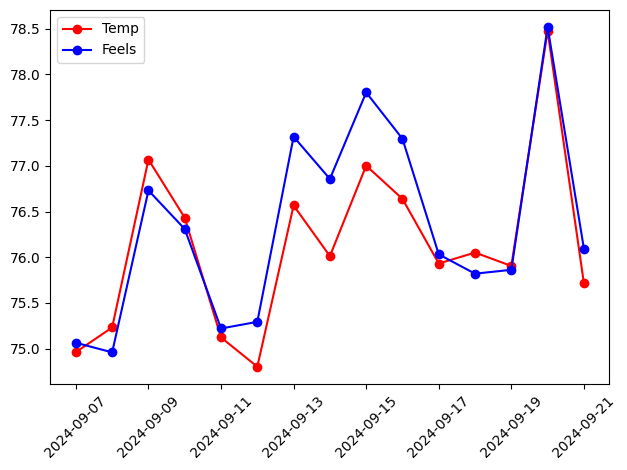

In [1]:
import polars as pl
from lib import load_with_polar, Graph

file_path = "./files"
file_name = "Urban-Air-Quality-and-Health-Impact-Dataset.csv"

df = load_with_polar(file_path, file_name)
df = df.with_columns(pl.col("datetime").str.to_datetime("%Y-%m-%d"))
df_grouped = (
    df.group_by(df["datetime"])
    .agg(avg_temp=pl.col("temp").mean(), avg_feel_like=pl.col("feelslike").mean())
    .sort("datetime")
)

graph = Graph(df_grouped, df_grouped["datetime"])
graph.set_dependent_variables(
    [
        {"data": df_grouped["avg_temp"], "label": "Temp", "co": "r"},
        {"data": df_grouped["avg_feel_like"], "label": "Feels", "co": "b"},
    ]
)
graph.set_title("Average Temperature and Feels Like Over Time")
graph.set_x_label("Date")
graph.set_y_label("Values")
graph.plot_and_show_graph()